# Count Pedestrians with CNN

From the street views collected from 114 NYC locations, we are going to detect pedestrians using CNN. 
Here we are going to use Google's Tensorflow Object Detection API(TODA). This will give you identified person in the picture and its probability. 

### install TODA
Install TODA under project_root/src/models by running this at project_root/src

```
git clone git@github.com:tensorflow/models.git
```
Then follow steps in the instruction below:

https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md

### get pre-trained network
Create models directory under project_root and download faster_rcnn_resnet101_coco network and unzip.
```
mkdir ../models
wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_11_06_2017.tar.gz -P ../models
gunzip -c ../models/faster_rcnn_resnet101_coco_11_06_2017.tar.gz | tar x -C ../models
```

* If you installed GODA or pretraned network in a different location, edit project_root/src/core.py accordingly.

## Import packages

In [1]:
import sys
import warnings
import os

from PIL import Image
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sys.path.append("../src")
from core import detect

warnings.filterwarnings('ignore')
%matplotlib inline

/Users/yonghah/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Detect

In [2]:
%%time
image_dir = '../data/raw/streetview-nyc'
out_dir = '../data/processed/streetview-nyc'
result = detect(image_dir, min_score_thresh=0.2, draw_box=True, out_dir=out_dir)

CPU times: user 30min 15s, sys: 45.1 s, total: 31min
Wall time: 9min 52s


## Check results

In [3]:
result.head()

,heading,lid,path,ped_exp
0,0,0,/Users/yonghah/repo/nyc_ped_count_cnn/data/raw...,4.661641
1,100,0,/Users/yonghah/repo/nyc_ped_count_cnn/data/raw...,0.000000
2,120,0,/Users/yonghah/repo/nyc_ped_count_cnn/data/raw...,0.959997
3,140,0,/Users/yonghah/repo/nyc_ped_count_cnn/data/raw...,0.000000
4,160,0,/Users/yonghah/repo/nyc_ped_count_cnn/data/raw...,0.925640


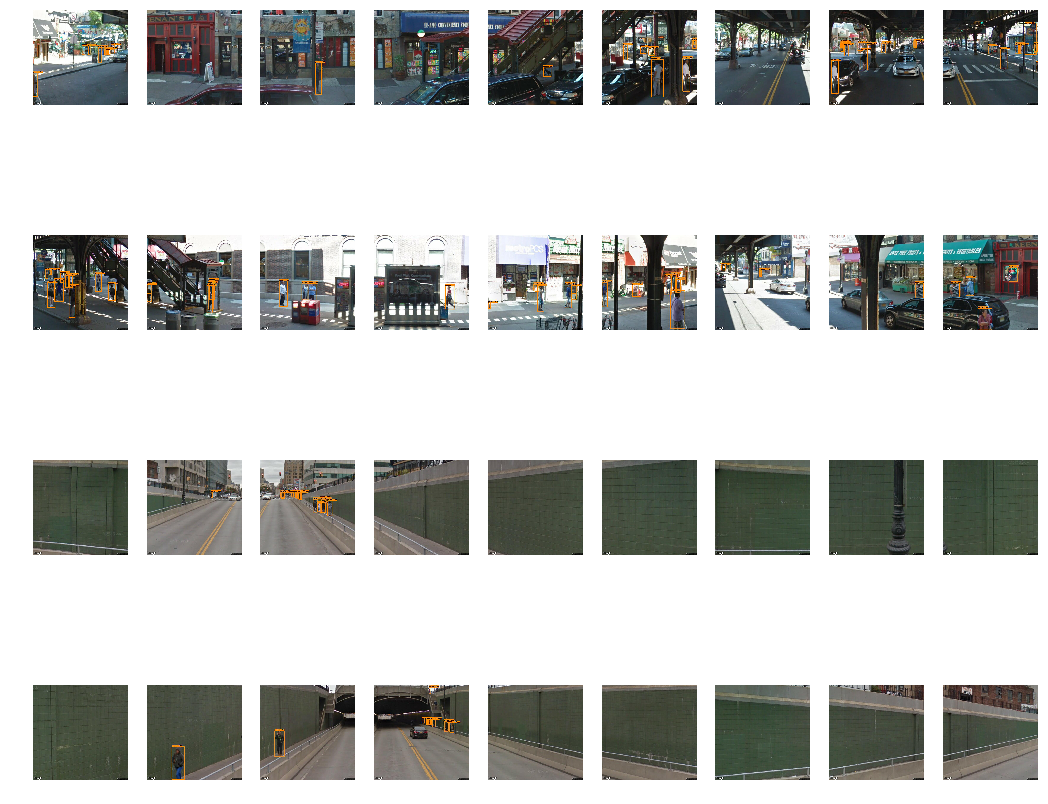

In [4]:
# look at images
images = []
outputs = "../data/processed/streetview-nyc"
pic_per_obs = 18
for img_path in sorted(glob.glob(outputs +'/*anno.jpeg'), key=os.path.getmtime):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(18,20))
columns = pic_per_obs /2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis('off')
    plt.imshow(image)

In [5]:
# group by lid
result.groupby('lid').agg('sum')

,ped_exp
lid,
0,53.939179
1,17.533063
